In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/divvy-trip-2019-cleaned/data_q2.csv
/kaggle/input/divvy-trip-2019-cleaned/data_q3.csv
/kaggle/input/divvy-trip-2019-cleaned/data_q1.csv
/kaggle/input/divvy-trip-2019-cleaned/data_q4.csv


In [2]:
# Create a DataFrame for each file
q1_path = '/kaggle/input/divvy-trip-2019-cleaned/data_q1.csv'
q2_path = '/kaggle/input/divvy-trip-2019-cleaned/data_q2.csv'
q3_path = '/kaggle/input/divvy-trip-2019-cleaned/data_q3.csv'
q4_path = '/kaggle/input/divvy-trip-2019-cleaned/data_q4.csv'

# Load the data
data_q1 = pd.read_csv(q1_path)
data_q2 = pd.read_csv(q2_path)
data_q3 = pd.read_csv(q3_path)
data_q4 = pd.read_csv(q4_path)

In [3]:
# Check the data
data_q1.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,ride_length,day_of_week
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0,0 days 00:06:30,2
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0,0 days 00:07:21,2
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0,0 days 00:13:49,2
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0,0 days 00:29:43,2
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0,0 days 00:06:04,2


In [4]:
data_q2.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,ride_length,day_of_week
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,446.0,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber,Male,1975.0,0 days 00:07:26,1
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,"1,048.0",317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber,Female,1984.0,0 days 00:17:28,1
2,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,252.0,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber,Male,1990.0,0 days 00:04:12,1
3,22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,357.0,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber,Male,1993.0,0 days 00:05:57,1
4,22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,"1,007.0",202,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber,Male,1992.0,0 days 00:16:47,1


In [5]:
data_q3.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,ride_length,day_of_week
0,23479388,2019-07-01 00:00:27,2019-07-01 00:20:41,3591,"1,214.0",117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992.000000,0 days 00:20:14,1
1,23479389,2019-07-01 00:01:16,2019-07-01 00:18:44,5353,"1,048.0",381,Western Ave & Monroe St,203,Western Ave & 21st St,Customer,unknown,1981.674297,0 days 00:17:28,1
2,23479390,2019-07-01 00:01:48,2019-07-01 00:27:42,6180,"1,554.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,unknown,1981.674297,0 days 00:25:54,1
3,23479391,2019-07-01 00:02:07,2019-07-01 00:27:10,5540,"1,503.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,unknown,1981.674297,0 days 00:25:03,1
4,23479392,2019-07-01 00:02:13,2019-07-01 00:22:26,6014,"1,213.0",168,Michigan Ave & 14th St,62,McCormick Place,Customer,unknown,1981.674297,0 days 00:20:13,1


In [6]:
data_q4.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,ride_length,day_of_week
0,25223640,2019-10-01 00:01:39,2019-10-01 00:17:20,2215,940.0,20,Sheffield Ave & Kingsbury St,309,Leavitt St & Armitage Ave,Subscriber,Male,1987.0,-92 days +00:19:02,1
1,25223641,2019-10-01 00:02:16,2019-10-01 00:06:34,6328,258.0,19,Throop (Loomis) St & Taylor St,241,Morgan St & Polk St,Subscriber,Male,1998.0,-92 days +00:16:28,1
2,25223642,2019-10-01 00:04:32,2019-10-01 00:18:43,3003,850.0,84,Milwaukee Ave & Grand Ave,199,Wabash Ave & Grand Ave,Subscriber,Female,1991.0,-92 days +00:23:10,1
3,25223643,2019-10-01 00:04:32,2019-10-01 00:43:43,3275,"2,350.0",313,Lakeview Ave & Fullerton Pkwy,290,Kedzie Ave & Palmer Ct,Subscriber,Male,1990.0,-92 days +00:22:38,1
4,25223644,2019-10-01 00:04:34,2019-10-01 00:35:42,5294,"1,867.0",210,Ashland Ave & Division St,382,Western Ave & Congress Pkwy,Subscriber,Male,1987.0,-92 days +00:17:52,1


## Visualization data for analysis

In [7]:
# Visualize pattern through the day
import matplotlib.pyplot as plt
import seaborn as sns

# Convert data type to datetime
data_q1['start_time'] = pd.to_datetime(data_q1['start_time'])
data_q2['start_time'] = pd.to_datetime(data_q2['start_time'])
data_q3['start_time'] = pd.to_datetime(data_q3['start_time'])
data_q4['start_time'] = pd.to_datetime(data_q4['start_time'])

# Create 'hour' coulmn to represent the time of day
data_q1['hour'] = data_q1['start_time'].dt.hour
data_q2['hour'] = data_q2['start_time'].dt.hour
data_q3['hour'] = data_q3['start_time'].dt.hour
data_q4['hour'] = data_q4['start_time'].dt.hour

In [8]:
# Display column names
print(data_q1.columns)

Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear', 'ride_length',
       'day_of_week', 'hour'],
      dtype='object')


### Visualize pattern throught day, week, and month

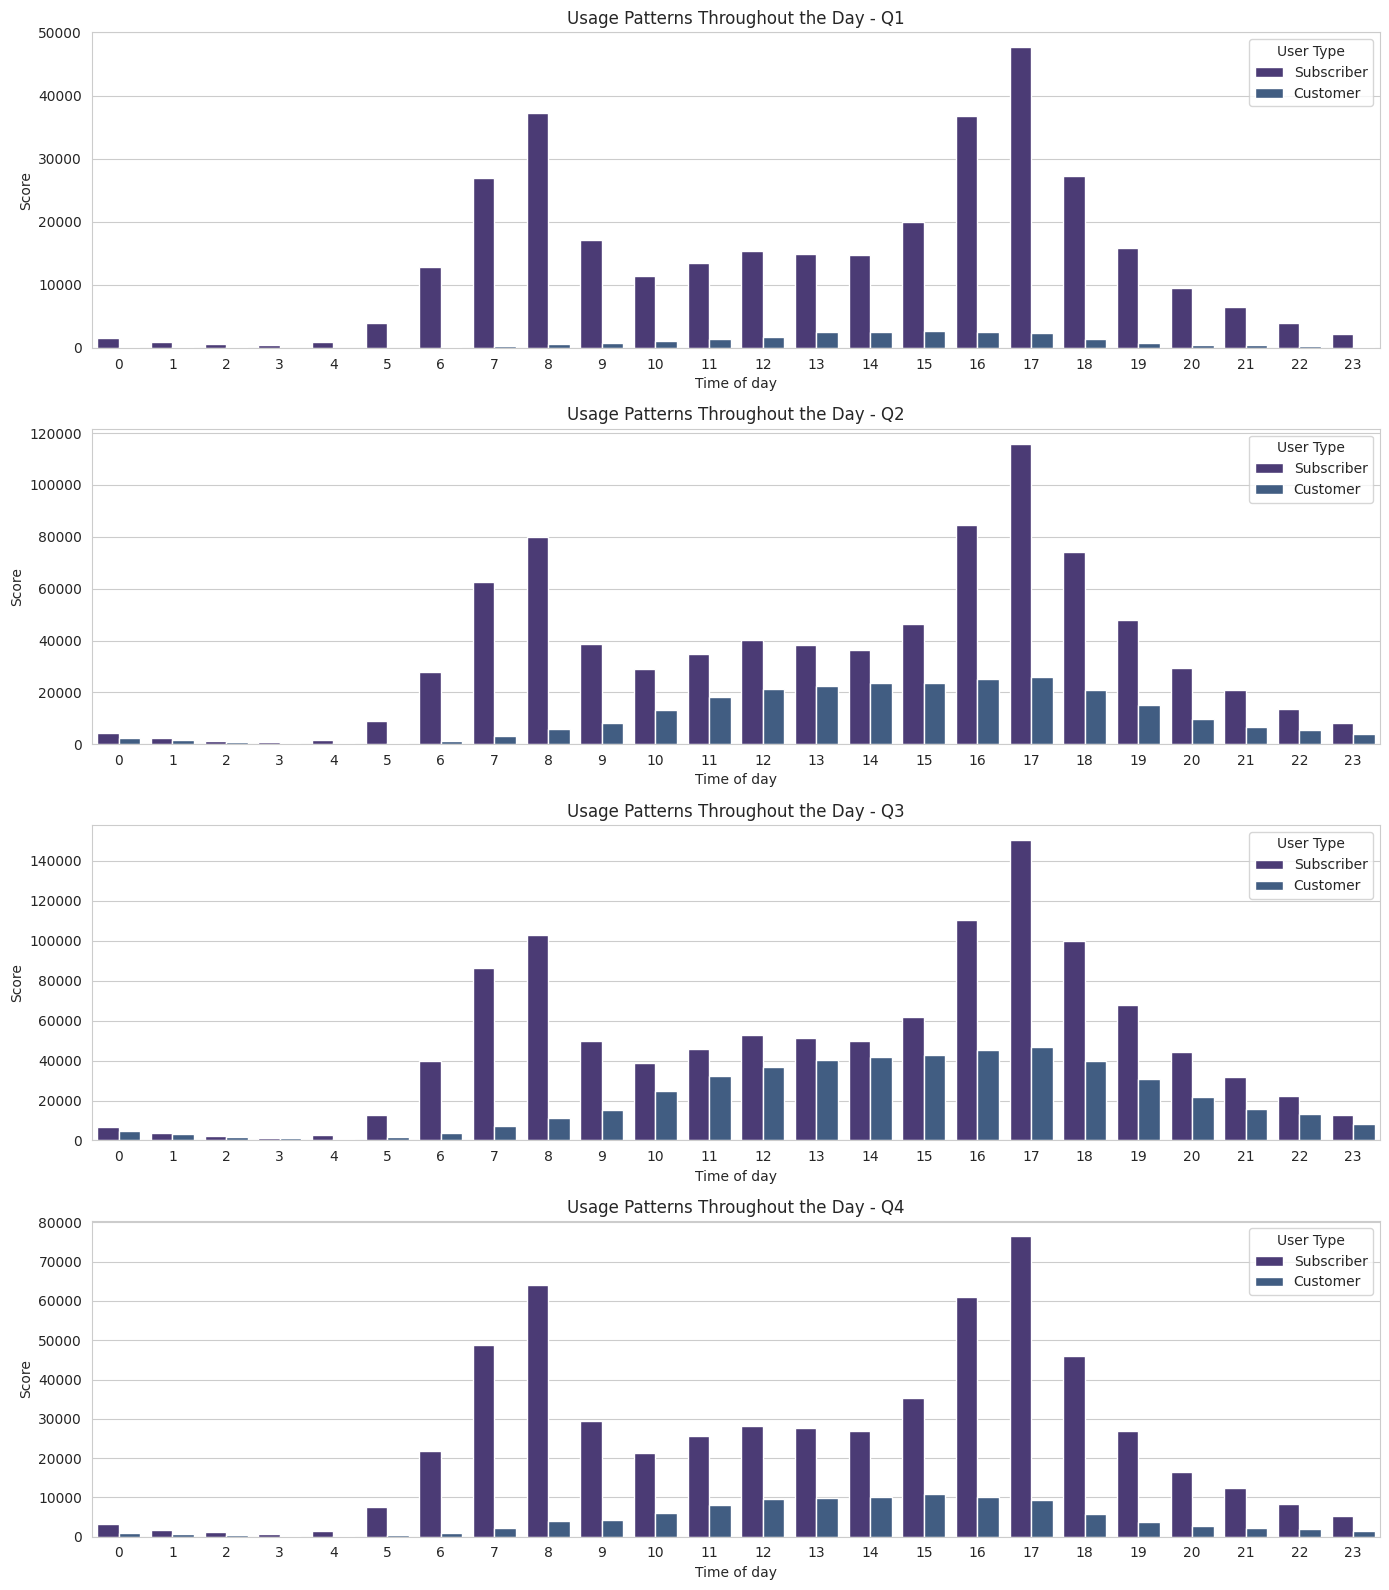

<Figure size 640x480 with 0 Axes>

In [9]:
# Visualization setting
sns.set_style("whitegrid")
sns.set_palette("viridis")

# Plot usage patterns throughout the day
plt.figure(figsize=(14, 16))

# Q1
plt.subplot(4, 1, 1)
sns.countplot(x='hour', data=data_q1, hue='usertype')
plt.title('Usage Patterns Throughout the Day - Q1')
plt.xlabel('Time of day')
plt.ylabel('Score')
plt.legend(title='User Type')

# Q2
plt.subplot(4, 1, 2)
sns.countplot(x='hour', data=data_q2, hue='usertype')
plt.title('Usage Patterns Throughout the Day - Q2')
plt.xlabel('Time of day')
plt.ylabel('Score')
plt.legend(title='User Type')

# Q3
plt.subplot(4, 1, 3)
sns.countplot(x='hour', data=data_q3, hue='usertype')
plt.title('Usage Patterns Throughout the Day - Q3')
plt.xlabel('Time of day')
plt.ylabel('Score')
plt.legend(title='User Type')

# Q4
plt.subplot(4, 1, 4)
sns.countplot(x='hour', data=data_q4, hue='usertype')
plt.title('Usage Patterns Throughout the Day - Q4')
plt.xlabel('Time of day')
plt.ylabel('Score')
plt.legend(title='User Type')

plt.tight_layout()
plt.savefig('Improved Usage Patterns.png')
plt.show()

# Your code to prepare and plot the usage patterns throughout the day.
plt.savefig('Usage_pattern.png')
plt.show()

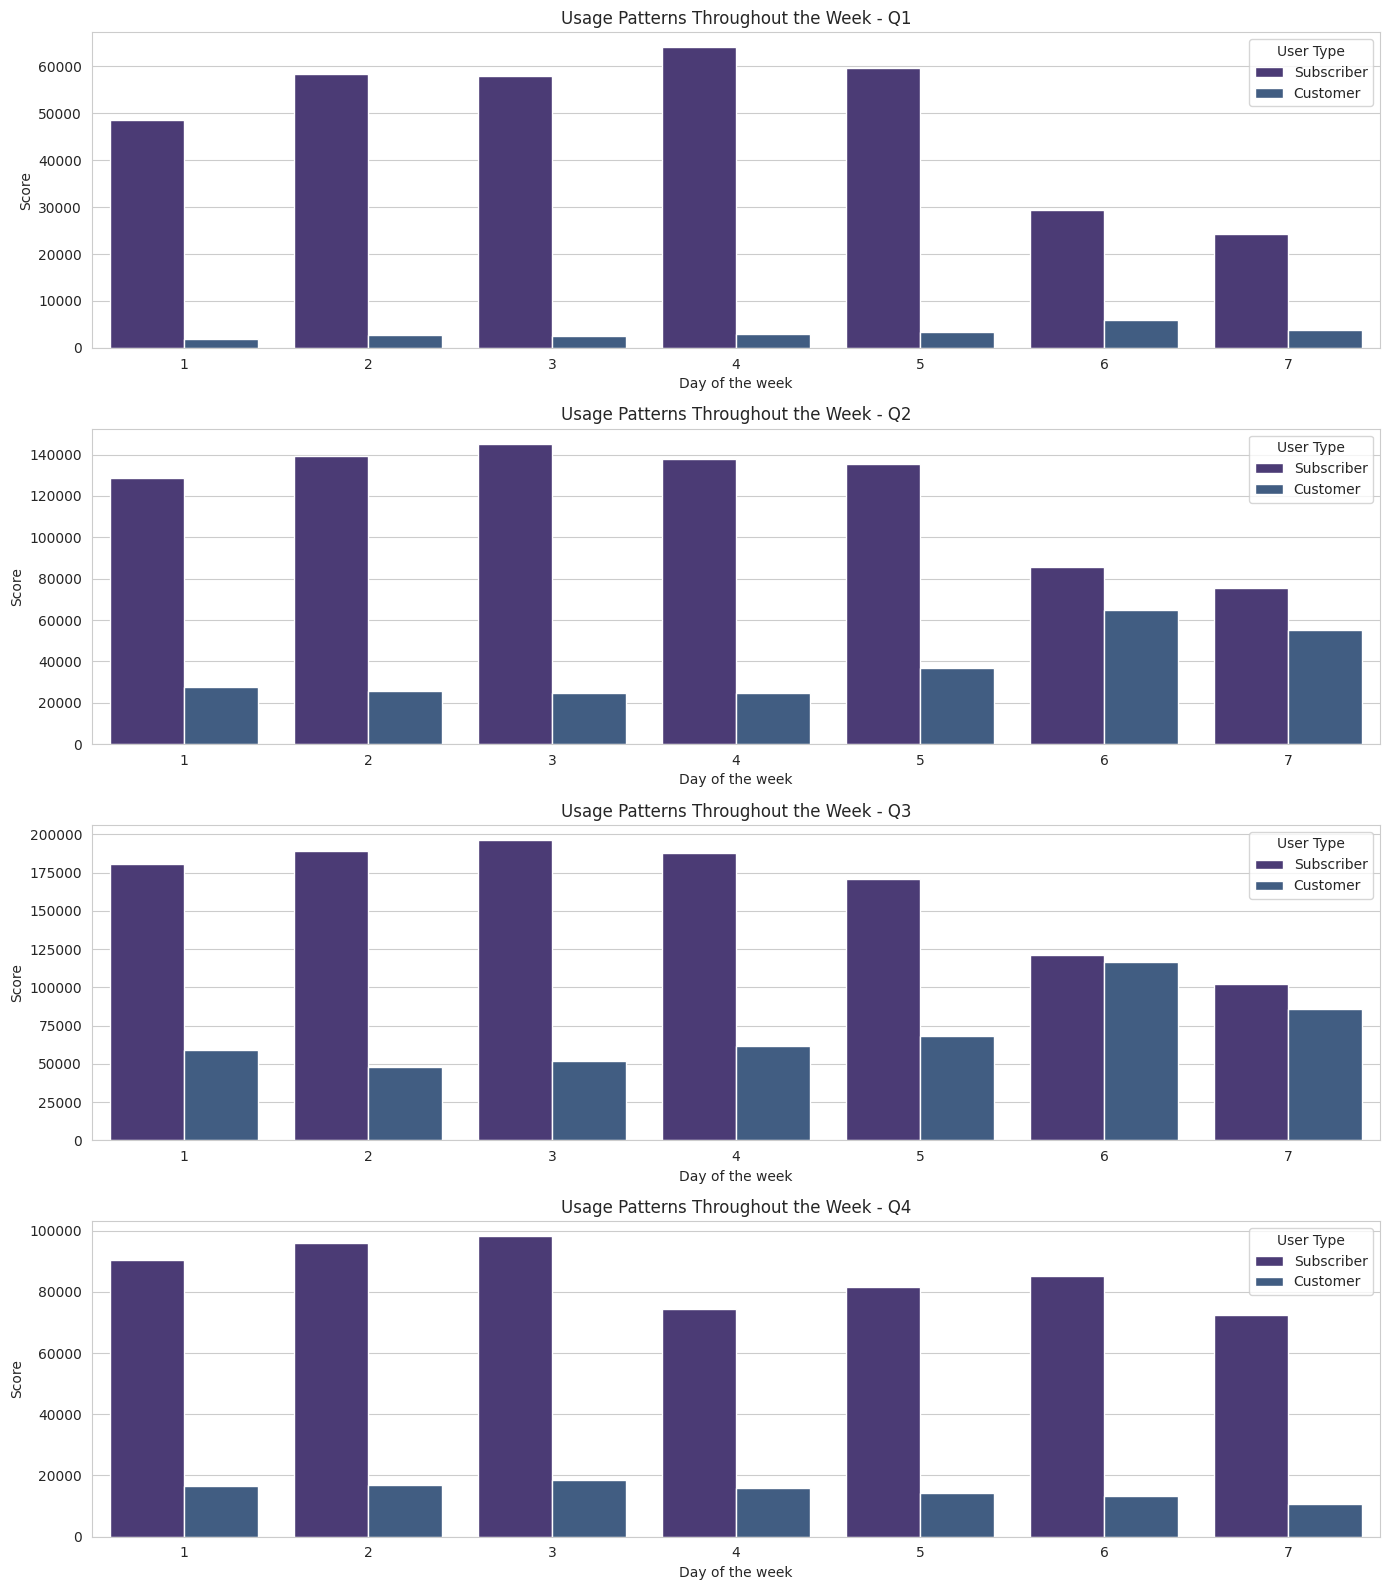

In [10]:
# Visualization setting
sns.set_style("whitegrid")
sns.set_palette("viridis")

# Plot usage patterns throughout the week
plt.figure(figsize=(14, 16))

# Q1
plt.subplot(4, 1, 1)
sns.countplot(x='day_of_week', data=data_q1, hue='usertype')
plt.title('Usage Patterns Throughout the Week - Q1')
plt.xlabel('Day of the week')
plt.ylabel('Score')
plt.legend(title='User Type')

# Q2
plt.subplot(4, 1, 2)
sns.countplot(x='day_of_week', data=data_q2, hue='usertype')
plt.title('Usage Patterns Throughout the Week - Q2')
plt.xlabel('Day of the week')
plt.ylabel('Score')
plt.legend(title='User Type')

# Q3
plt.subplot(4, 1, 3)
sns.countplot(x='day_of_week', data=data_q3, hue='usertype')
plt.title('Usage Patterns Throughout the Week - Q3')
plt.xlabel('Day of the week')
plt.ylabel('Score')
plt.legend(title='User Type')

# Q4
plt.subplot(4, 1, 4)
sns.countplot(x='day_of_week', data=data_q4, hue='usertype')
plt.title('Usage Patterns Throughout the Week - Q4')
plt.xlabel('Day of the week')
plt.ylabel('Score')
plt.legend(title='User Type')

plt.tight_layout()
plt.savefig('Weekly_usage_pattern.png')
plt.show()

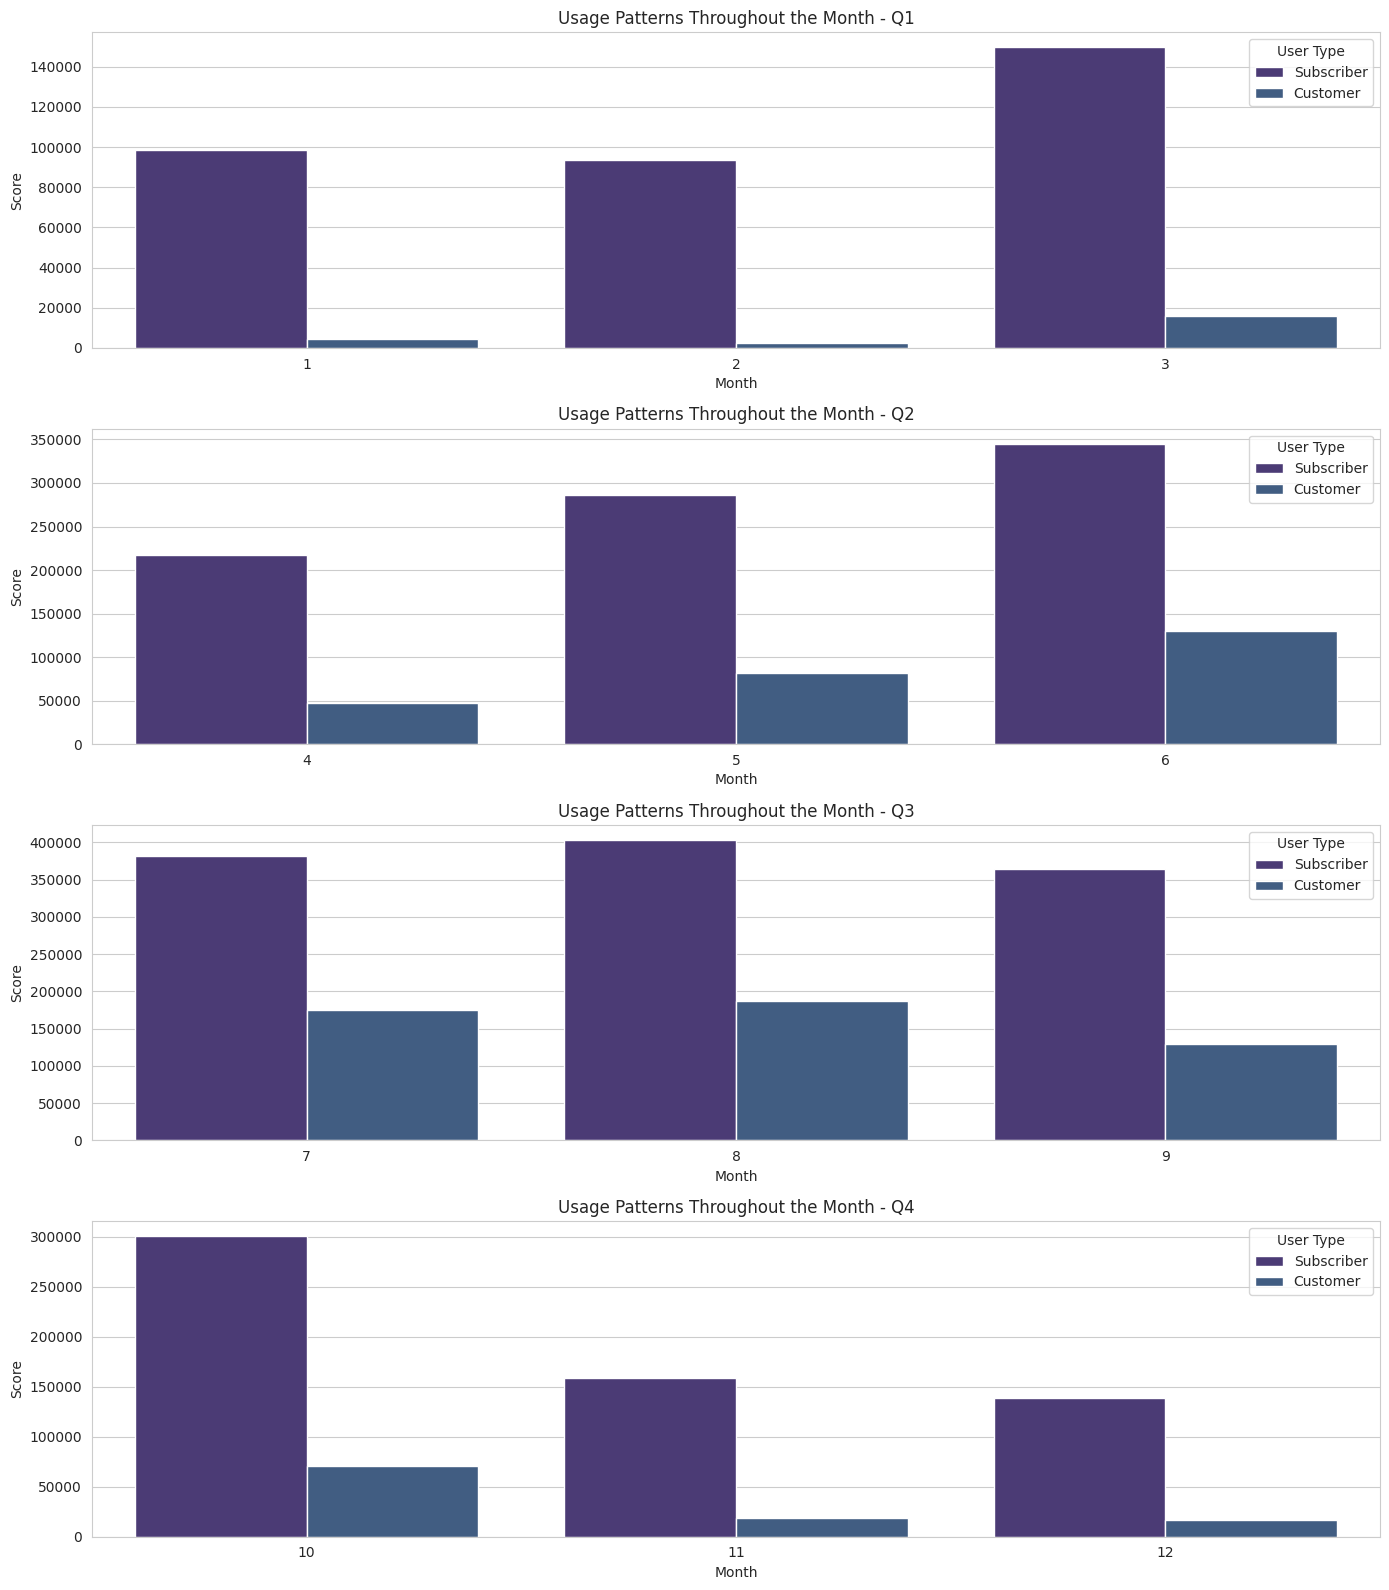

In [11]:
# Visualize pattern through the month
data_q1['month'] = data_q1['start_time'].dt.month
data_q2['month'] = data_q2['start_time'].dt.month
data_q3['month'] = data_q3['start_time'].dt.month
data_q4['month'] = data_q4['start_time'].dt.month

# Visualization settings
sns.set_style("whitegrid")
sns.set_palette("viridis")

# Plot usage patterns throughout the month
plt.figure(figsize=(14, 16))

# Q1
plt.subplot(4, 1, 1)
sns.countplot(x='month', data=data_q1, hue='usertype')
plt.title('Usage Patterns Throughout the Month - Q1')
plt.xlabel('Month')
plt.ylabel('Score')
plt.legend(title='User Type')

# Q2
plt.subplot(4, 1, 2)
sns.countplot(x='month', data=data_q2, hue='usertype')
plt.title('Usage Patterns Throughout the Month - Q2')
plt.xlabel('Month')
plt.ylabel('Score')
plt.legend(title='User Type')

# Q3
plt.subplot(4, 1, 3)
sns.countplot(x='month', data=data_q3, hue='usertype')
plt.title('Usage Patterns Throughout the Month - Q3')
plt.xlabel('Month')
plt.ylabel('Score')
plt.legend(title='User Type')

# Q4
plt.subplot(4, 1, 4)
sns.countplot(x='month', data=data_q4, hue='usertype')
plt.title('Usage Patterns Throughout the Month - Q4')
plt.xlabel('Month')
plt.ylabel('Score')
plt.legend(title='User Type')

plt.tight_layout()
plt.savefig('Monthly_usage_pattern.png')
plt.show()

### Visualize Top 10 most visited destinations

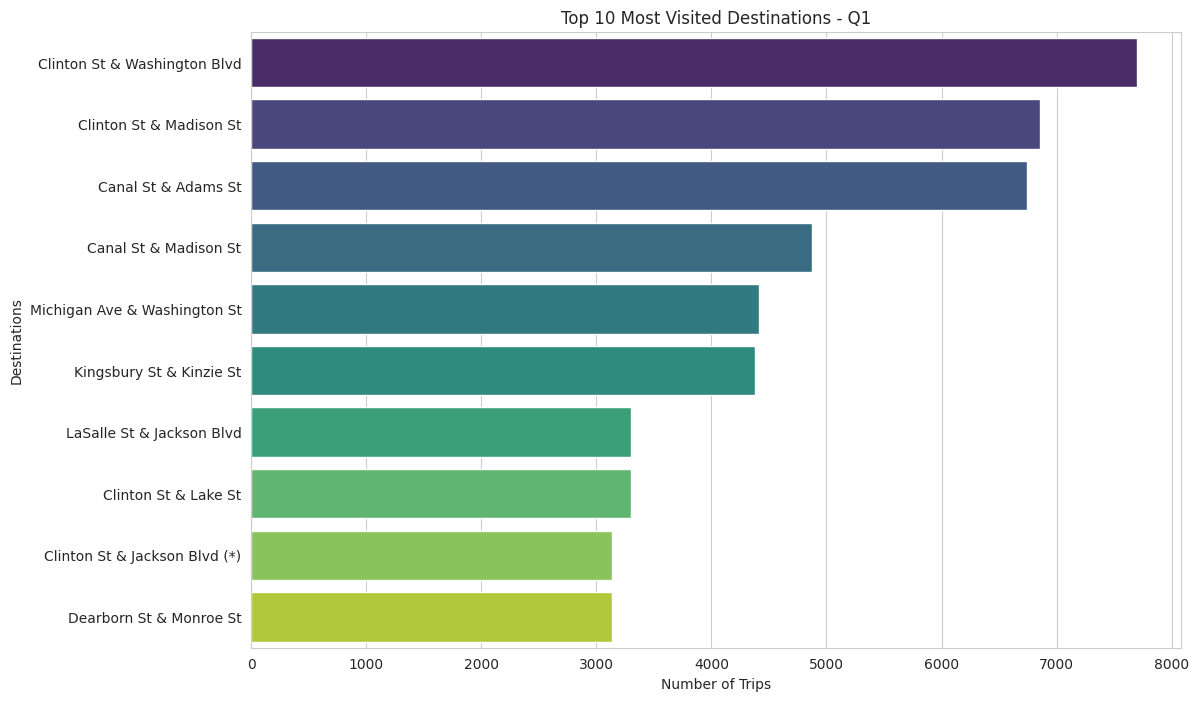

<Figure size 640x480 with 0 Axes>

In [12]:
# For Q1
# Group by to_station_name and count the number of trips
destinations_count_q1 = data_q1.groupby('to_station_name').size().reset_index(name='count')

# Oder destinations based on count
top_destinations_q1 = destinations_count_q1.nlargest(10, 'count')

# Create bar chart visualization
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='to_station_name', data=top_destinations_q1, palette='viridis')
plt.title('Top 10 Most Visited Destinations - Q1')
plt.xlabel('Number of Trips')
plt.ylabel('Destinations')
plt.show()

# Save as images
plt.savefig('top_destinations_q1.png')

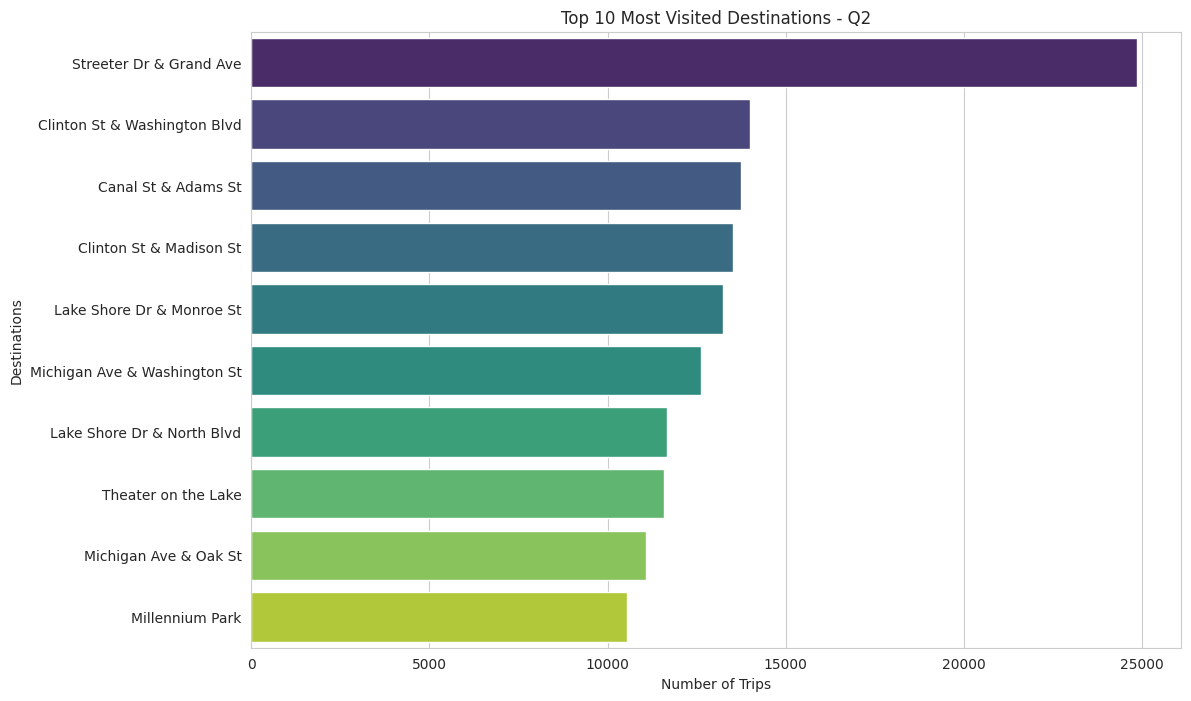

<Figure size 640x480 with 0 Axes>

In [13]:
# For Q2
# Group by to_station_name and count the number of trips
destinations_count_q2 = data_q2.groupby('to_station_name').size().reset_index(name='count')

# Oder destinations based on count
top_destinations_q2 = destinations_count_q2.nlargest(10, 'count')

# Create bar chart visualization
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='to_station_name', data=top_destinations_q2, palette='viridis')
plt.title('Top 10 Most Visited Destinations - Q2')
plt.xlabel('Number of Trips')
plt.ylabel('Destinations')
plt.show()

# Save as images
plt.savefig('top_destinations_q2.png')

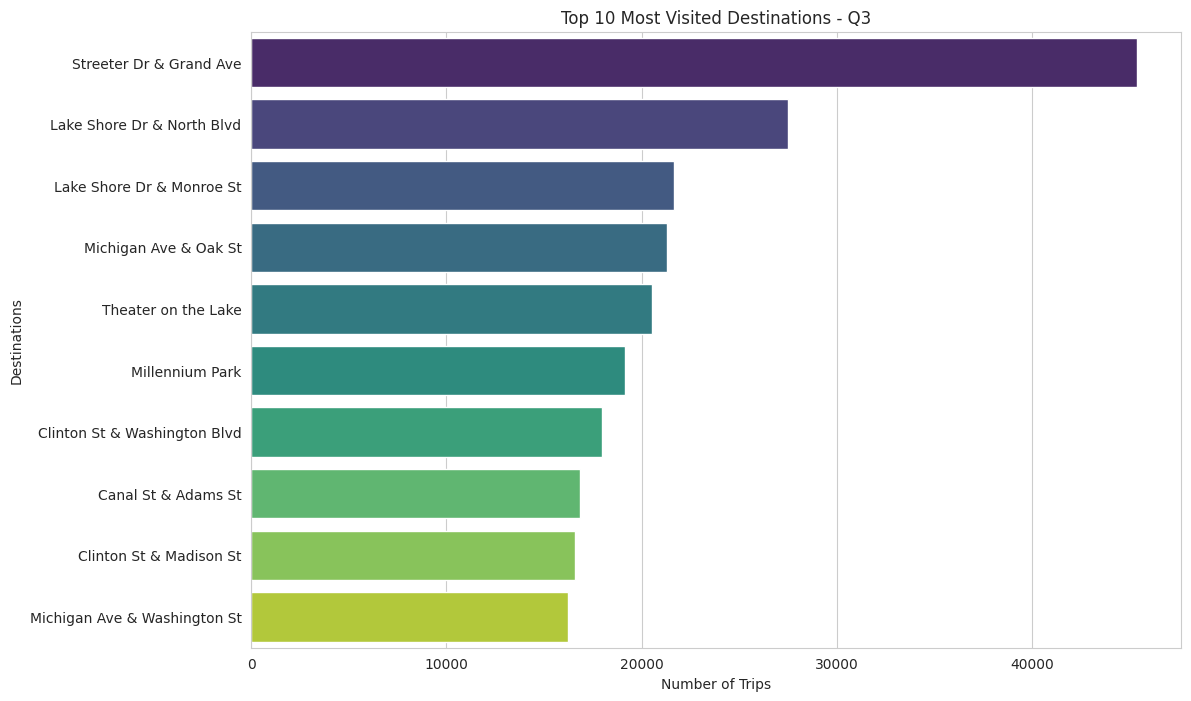

<Figure size 640x480 with 0 Axes>

In [14]:
# For Q3
# Group by to_station_name and count the number of trips
destinations_count_q3 = data_q3.groupby('to_station_name').size().reset_index(name='count')

# Oder destinations based on count
top_destinations_q3 = destinations_count_q3.nlargest(10, 'count')

# Create bar chart visualization
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='to_station_name', data=top_destinations_q3, palette='viridis')
plt.title('Top 10 Most Visited Destinations - Q3')
plt.xlabel('Number of Trips')
plt.ylabel('Destinations')
plt.show()

# Save as images
plt.savefig('top_destinations_q3.png')

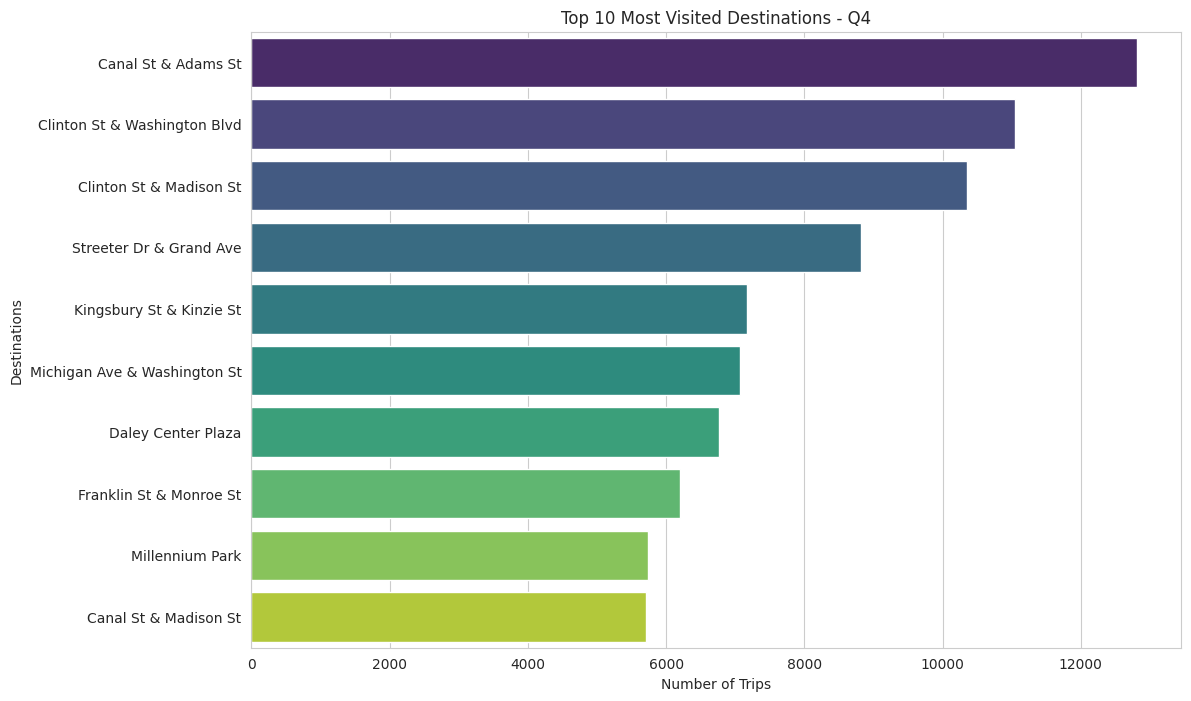

<Figure size 640x480 with 0 Axes>

In [15]:
# For Q4
# Group by to_station_name and count the number of trips
destinations_count_q4 = data_q4.groupby('to_station_name').size().reset_index(name='count')

# Oder destinations based on count
top_destinations_q4 = destinations_count_q4.nlargest(10, 'count')

# Create bar chart visualization
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='to_station_name', data=top_destinations_q4, palette='viridis')
plt.title('Top 10 Most Visited Destinations - Q4')
plt.xlabel('Number of Trips')
plt.ylabel('Destinations')
plt.show()

# Save as images
plt.savefig('top_destinations_q4.png')

### Visualize Top 10 Most Visited Destinations for Each User Type

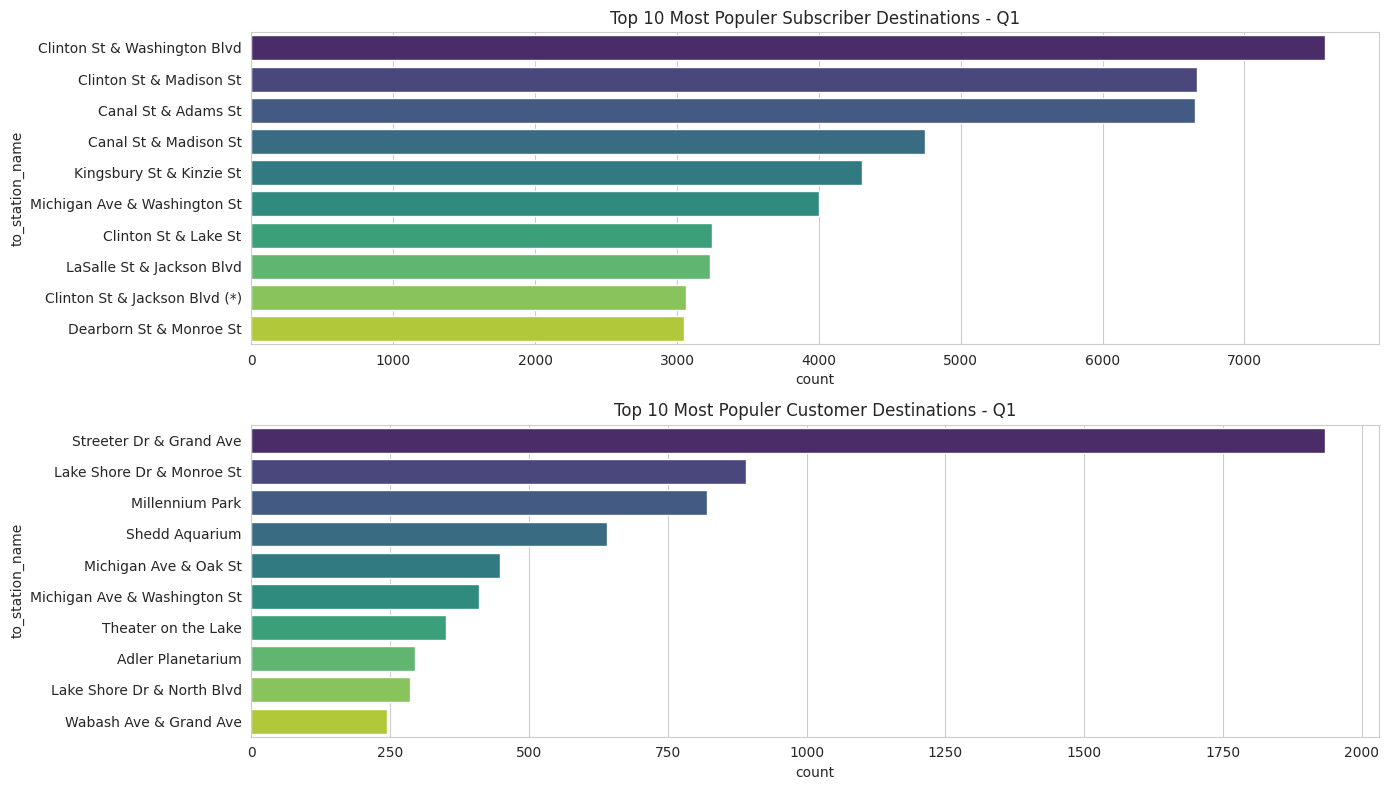

In [16]:
# Q1
# Calculate trip count for each destination by user type
destinations_count = data_q1.groupby(['to_station_name', 'usertype']).size().reset_index(name='count')

# Filter the 10 most populer destination for each type of user
top_destinations_subscriber = destinations_count[destinations_count['usertype'] == 'Subscriber'].nlargest(10, 'count')
top_destinations_customer = destinations_count[destinations_count['usertype'] == 'Customer'].nlargest(10, 'count')

# Create separate bar chart for each user type
plt.figure(figsize=(14, 8))
plt.subplot(2, 1, 1)
sns.barplot(x='count', y='to_station_name', data=top_destinations_subscriber, palette='viridis')
plt.title('Top 10 Most Populer Subscriber Destinations - Q1')

plt.subplot(2, 1, 2)
sns.barplot(x='count', y='to_station_name', data=top_destinations_customer, palette='viridis')
plt.title('Top 10 Most Populer Customer Destinations - Q1')

# Save as images
plt.savefig('top_destinations_by_user_q1')

plt.tight_layout()
plt.show()

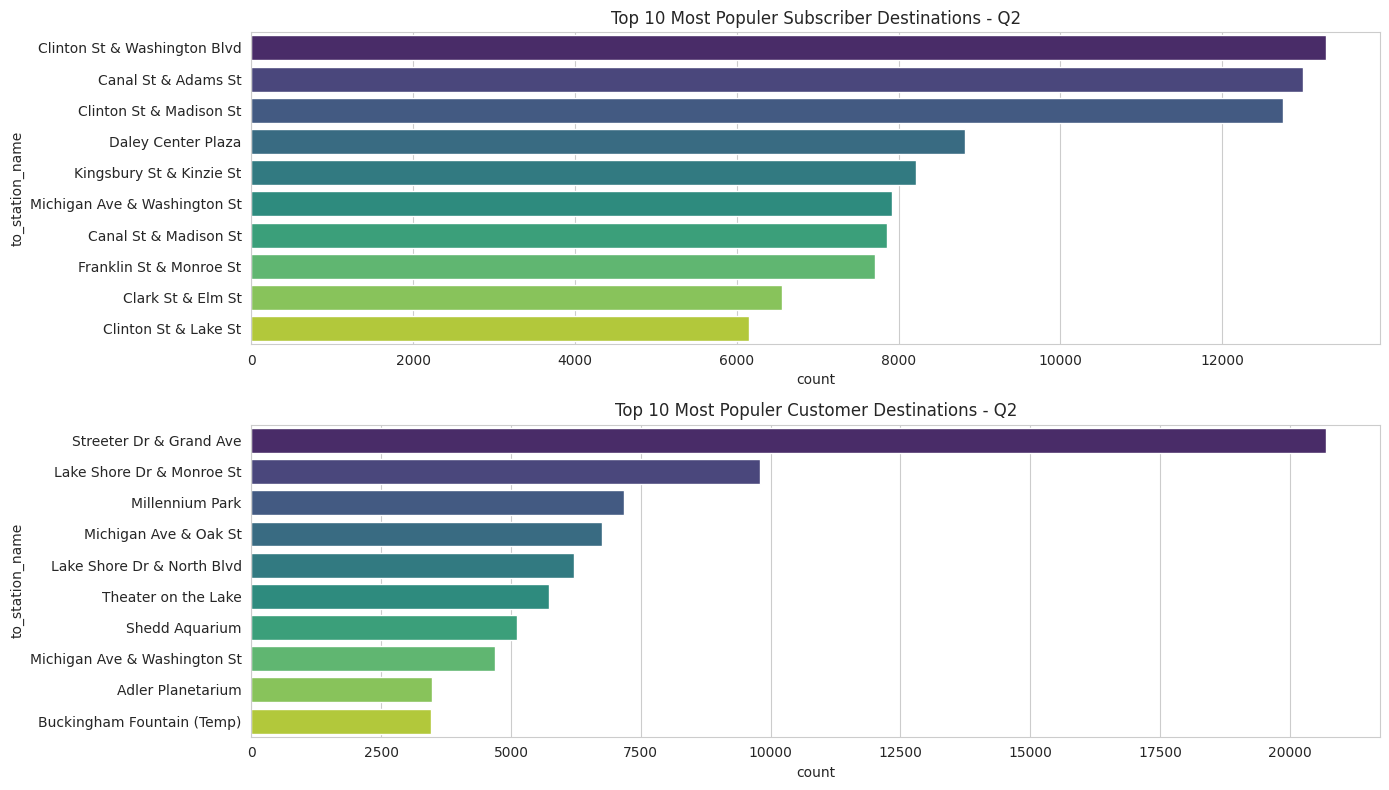

In [17]:
# Q2
# Calculate trip count for each destination by user type
destinations_count_q2 = data_q2.groupby(['to_station_name', 'usertype']).size().reset_index(name='count')

# Filter the 10 most populer destination for each type of user
top_destinations_subscriber_q2 = destinations_count_q2[destinations_count_q2['usertype'] == 'Subscriber'].nlargest(10, 'count')
top_destinations_customer_q2 = destinations_count_q2[destinations_count_q2['usertype'] == 'Customer'].nlargest(10, 'count')

# Create separate bar chart for each user type
plt.figure(figsize=(14, 8))
plt.subplot(2, 1, 1)
sns.barplot(x='count', y='to_station_name', data=top_destinations_subscriber_q2, palette='viridis')
plt.title('Top 10 Most Populer Subscriber Destinations - Q2')

plt.subplot(2, 1, 2)
sns.barplot(x='count', y='to_station_name', data=top_destinations_customer_q2, palette='viridis')
plt.title('Top 10 Most Populer Customer Destinations - Q2')

# Save as images
plt.savefig('top_destinations_by_user_q2')

plt.tight_layout()
plt.show()

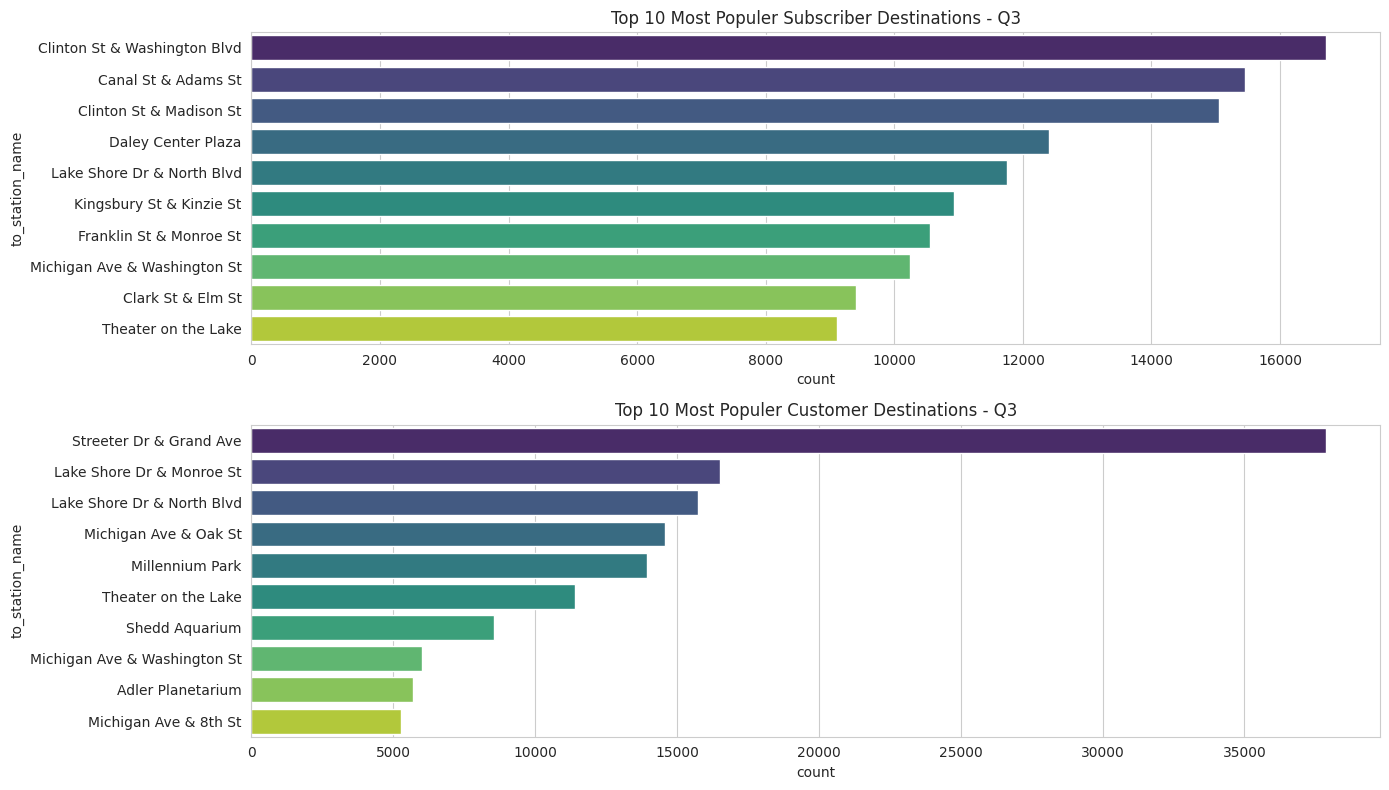

In [18]:
# Q3
# Calculate trip count for each destination by user type
destinations_count_q3 = data_q3.groupby(['to_station_name', 'usertype']).size().reset_index(name='count')

# Filter the 10 most populer destination for each type of user
top_destinations_subscriber_q3 = destinations_count_q3[destinations_count_q3['usertype'] == 'Subscriber'].nlargest(10, 'count')
top_destinations_customer_q3 = destinations_count_q3[destinations_count_q3['usertype'] == 'Customer'].nlargest(10, 'count')

# Create separate bar chart for each user type
plt.figure(figsize=(14, 8))
plt.subplot(2, 1, 1)
sns.barplot(x='count', y='to_station_name', data=top_destinations_subscriber_q3, palette='viridis')
plt.title('Top 10 Most Populer Subscriber Destinations - Q3')

plt.subplot(2, 1, 2)
sns.barplot(x='count', y='to_station_name', data=top_destinations_customer_q3, palette='viridis')
plt.title('Top 10 Most Populer Customer Destinations - Q3')

# Save as images
plt.savefig('top_destinations_by_user_q3')

plt.tight_layout()
plt.show()

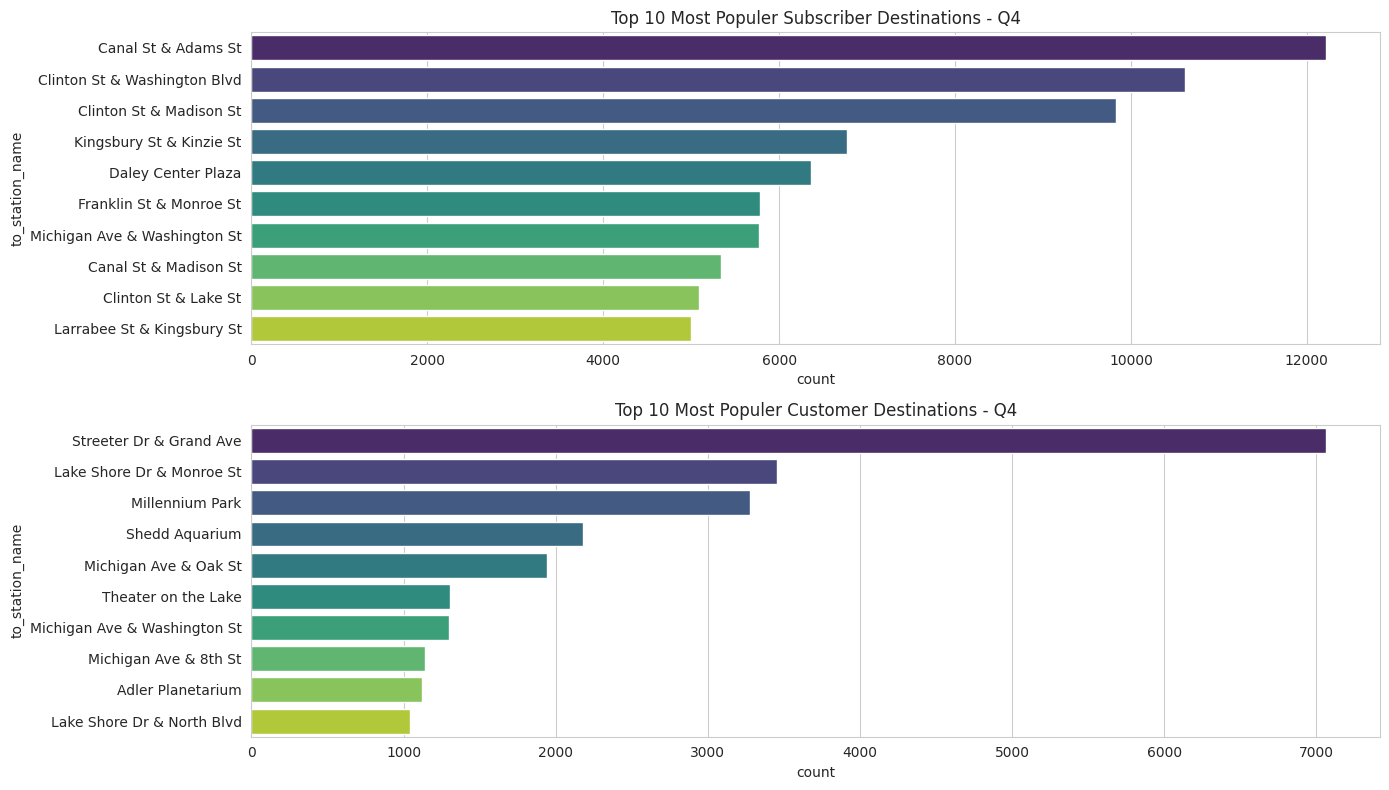

In [19]:
# Q4
# Calculate trip count for each destination by user type
destinations_count_q4 = data_q4.groupby(['to_station_name', 'usertype']).size().reset_index(name='count')

# Filter the 10 most populer destination for each type of user
top_destinations_subscriber_q4 = destinations_count_q4[destinations_count_q4['usertype'] == 'Subscriber'].nlargest(10, 'count')
top_destinations_customer_q4 = destinations_count_q4[destinations_count_q4['usertype'] == 'Customer'].nlargest(10, 'count')

# Create separate bar chart for each user type
plt.figure(figsize=(14, 8))
plt.subplot(2, 1, 1)
sns.barplot(x='count', y='to_station_name', data=top_destinations_subscriber_q4, palette='viridis')
plt.title('Top 10 Most Populer Subscriber Destinations - Q4')

plt.subplot(2, 1, 2)
sns.barplot(x='count', y='to_station_name', data=top_destinations_customer_q4, palette='viridis')
plt.title('Top 10 Most Populer Customer Destinations - Q4')

# Save as images
plt.savefig('top_destinations_by_user_q3')

plt.tight_layout()
plt.show()

### Concatenate the Dataframes

In [20]:
all_data = pd.concat([data_q1, data_q2, data_q3, data_q4])
all_data.describe()

,trip_id,start_time,bikeid,from_station_id,to_station_id,birthyear,day_of_week,hour,month
count,3.818004e+06,3818004,3.818004e+06,3.818004e+06,3.818004e+06,3.818004e+06,3.818004e+06,3.818004e+06,3.818004e+06
mean,2.391563e+07,2019-07-19 21:47:37.115991040,3.380252e+03,2.016659e+02,2.026363e+02,1.983843e+03,3.867160e+00,1.377171e+01,7.106573e+00
min,2.174244e+07,2019-01-01 00:04:37,1.000000e+00,1.000000e+00,1.000000e+00,1.759000e+03,1.000000e+00,0.000000e+00,1.000000e+00
25%,2.287379e+07,2019-05-29 15:49:26.500000,1.727000e+03,7.700000e+01,7.700000e+01,1.981000e+03,2.000000e+00,1.000000e+01,5.000000e+00
50%,2.396232e+07,2019-07-25 17:50:54,3.451000e+03,1.740000e+02,1.740000e+02,1.985000e+03,4.000000e+00,1.500000e+01,7.000000e+00
75%,2.496370e+07,2019-09-15 06:48:05.750000128,5.046000e+03,2.890000e+02,2.910000e+02,1.991000e+03,5.000000e+00,1.700000e+01,9.000000e+00
max,2.596290e+07,2019-12-31 23:57:17,6.946000e+03,6.730000e+02,6.730000e+02,2.014000e+03,7.000000e+00,2.300000e+01,1.200000e+01
std,1.212667e+06,NaN,1.902511e+03,1.560798e+02,1.562388e+02,1.009714e+01,1.938535e+00,4.716919e+00,2.593617e+00


In [21]:
# Information about all dataframe
print("1. Variable names (Columns):")
print(all_data.columns.tolist())

print("\n2. Data Type:")
print(all_data.dtypes)

print("\n3. Descriptive Statistics:")
print(all_data.describe())

print("\n4. DataFrame Shape:")
print(all_data.shape)

1. Variable names (Columns):
['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration', 'from_station_id', 'from_station_name', 'to_station_id', 'to_station_name', 'usertype', 'gender', 'birthyear', 'ride_length', 'day_of_week', 'hour', 'month']

2. Data Type:
trip_id                       int64
start_time           datetime64[ns]
end_time                     object
bikeid                        int64
tripduration                 object
from_station_id               int64
from_station_name            object
to_station_id                 int64
to_station_name              object
usertype                     object
gender                       object
birthyear                   float64
ride_length                  object
day_of_week                   int64
hour                          int32
month                         int32
dtype: object

3. Descriptive Statistics:
            trip_id                     start_time        bikeid  \
count  3.818004e+06                        38180

### Visualize user birthyear older than 1940 and not null

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


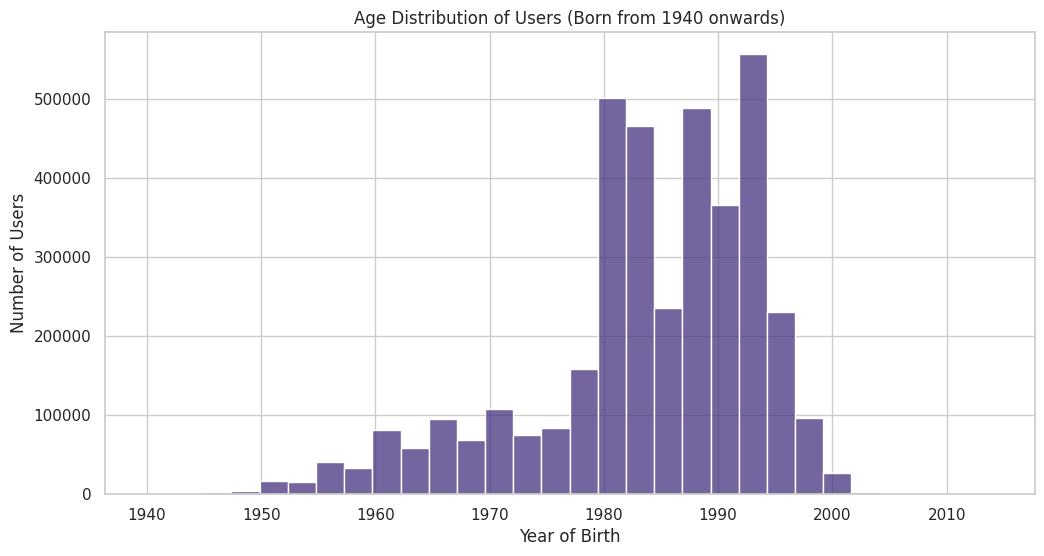

Average Age: 1983.87
Median Age: 1985.00


In [22]:
filtered_data = all_data[(all_data['birthyear'].notnull()) & (all_data['birthyear'] >=1940)]

# Configure style and palette
sns.set_theme(style="whitegrid", palette="viridis")

# Create Histogram
plt.figure(figsize=(12, 6))
sns.histplot(filtered_data['birthyear'], bins = 30, kde=False)
plt.title('Age Distribution of Users (Born from 1940 onwards)')
plt.xlabel('Year of Birth')
plt.ylabel('Number of Users')
plt.savefig('birtyear_x_user.png')
plt.show()

# Calculate statistics descriptive
mean_age = filtered_data['birthyear'].mean()
median_age = filtered_data['birthyear'].median()

print(f'Average Age: {mean_age:.2f}')
print(f'Median Age: {median_age:.2f}')

In [23]:
# Group by user type and gender and calculate descriptive age statistics
age_stats = all_data.groupby(['usertype', 'gender'])['birthyear'].agg(['mean', 'median']).reset_index()

# Rename columns for clarity
age_stats.columns = ['usertype', 'gender', 'mean_age', 'median_age']

print(age_stats)

     usertype   gender     mean_age   median_age
0    Customer   Female  1988.935506  1992.000000
1    Customer     Male  1987.504824  1990.000000
2    Customer  unknown  1982.475153  1981.674297
3  Subscriber   Female  1984.905343  1989.000000
4  Subscriber     Male  1983.186109  1986.000000
5  Subscriber  unknown  1981.697743  1981.674297


### Save concatenate DataFrame

In [24]:
# Reading DataFrame
data_q1 = pd.read_csv(q1_path)
data_q2 = pd.read_csv(q2_path)
data_q3 = pd.read_csv(q3_path)
data_q4 = pd.read_csv(q4_path)

all_data = pd.concat([data_q1, data_q2, data_q3, data_q4], ignore_index=True)

# Checking the new DataFrame
print(all_data.head())

# Save the new DataFrame
all_data.to_csv('all_data.csv', index=False)

    trip_id           start_time             end_time  bikeid tripduration  \
0  21742443  2019-01-01 00:04:37  2019-01-01 00:11:07    2167        390.0   
1  21742444  2019-01-01 00:08:13  2019-01-01 00:15:34    4386        441.0   
2  21742445  2019-01-01 00:13:23  2019-01-01 00:27:12    1524        829.0   
3  21742446  2019-01-01 00:13:45  2019-01-01 00:43:28     252      1,783.0   
4  21742447  2019-01-01 00:14:52  2019-01-01 00:20:56    1170        364.0   

   from_station_id                    from_station_name  to_station_id  \
0              199               Wabash Ave & Grand Ave             84   
1               44               State St & Randolph St            624   
2               15                 Racine Ave & 18th St            644   
3              123       California Ave & Milwaukee Ave            176   
4              173  Mies van der Rohe Way & Chicago Ave             35   

                  to_station_name    usertype  gender  birthyear  \
0       Milwaukee 

### Visualize relationship between gender and user type

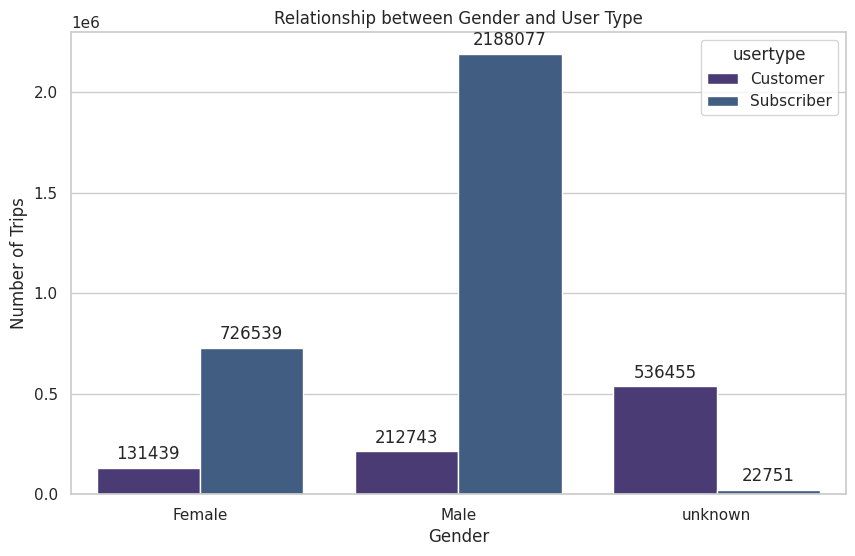

In [25]:
# Configure style and palette
sns.set_theme(style="whitegrid", palette="viridis")

# Trip count for each user type and gender
gender_user_count = all_data.groupby(['gender', 'usertype']).size().reset_index(name='count')

# Create bar plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='gender', y='count', hue='usertype', data=gender_user_count)

# Add labels to bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(),'.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center', xytext = (0, 10),
                    textcoords = 'offset points')

plt.title('Relationship between Gender and User Type')
plt.xlabel('Gender')
plt.ylabel('Number of Trips')

# Save as images
plt.savefig('gender_x_user.png')
plt.show()

### Visualize Seasonal Analysis by User Type

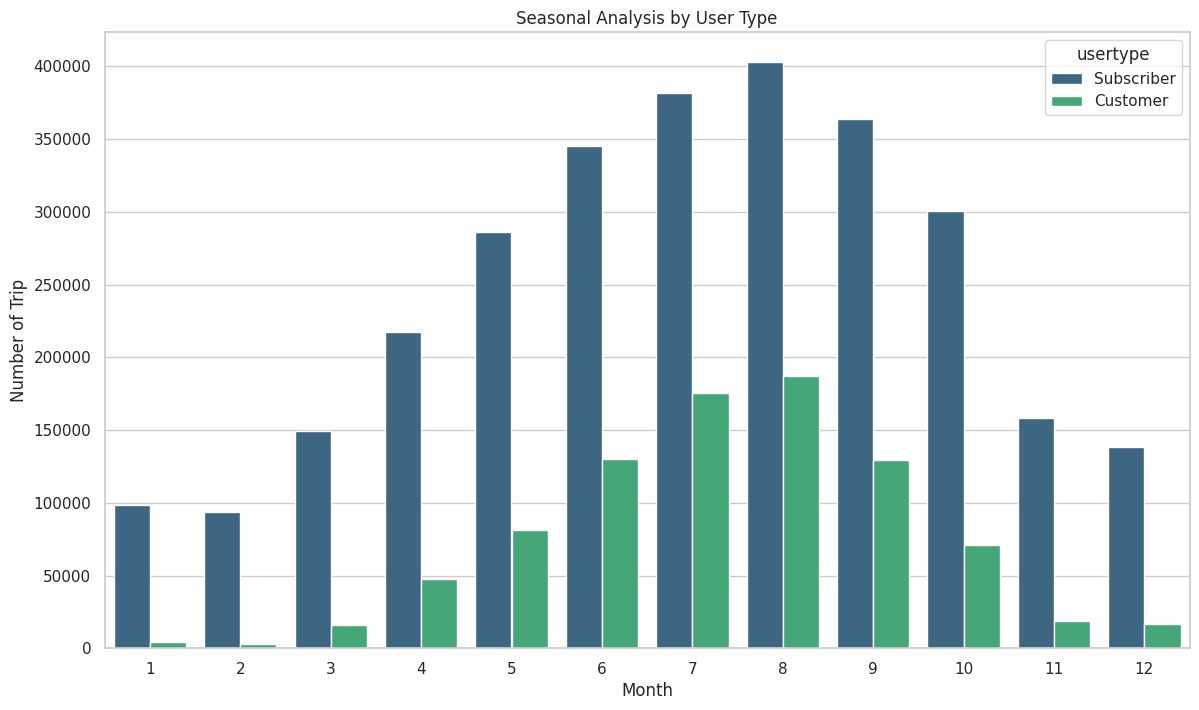

In [26]:
# Convert 'start_time' to datetime
all_data['start_time'] = pd.to_datetime(all_data['start_time'])

# Extract month from 'start_time'
all_data['month'] = all_data['start_time'].dt.month

# Create bar graphics
plt.figure(figsize=(14, 8))
sns.countplot(x='month', hue='usertype', data=all_data, palette='viridis')
plt.title('Seasonal Analysis by User Type')
plt.xlabel('Month')
plt.ylabel('Number of Trip')
plt.show()

### Visualize age distribution by user type (born after 1950)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

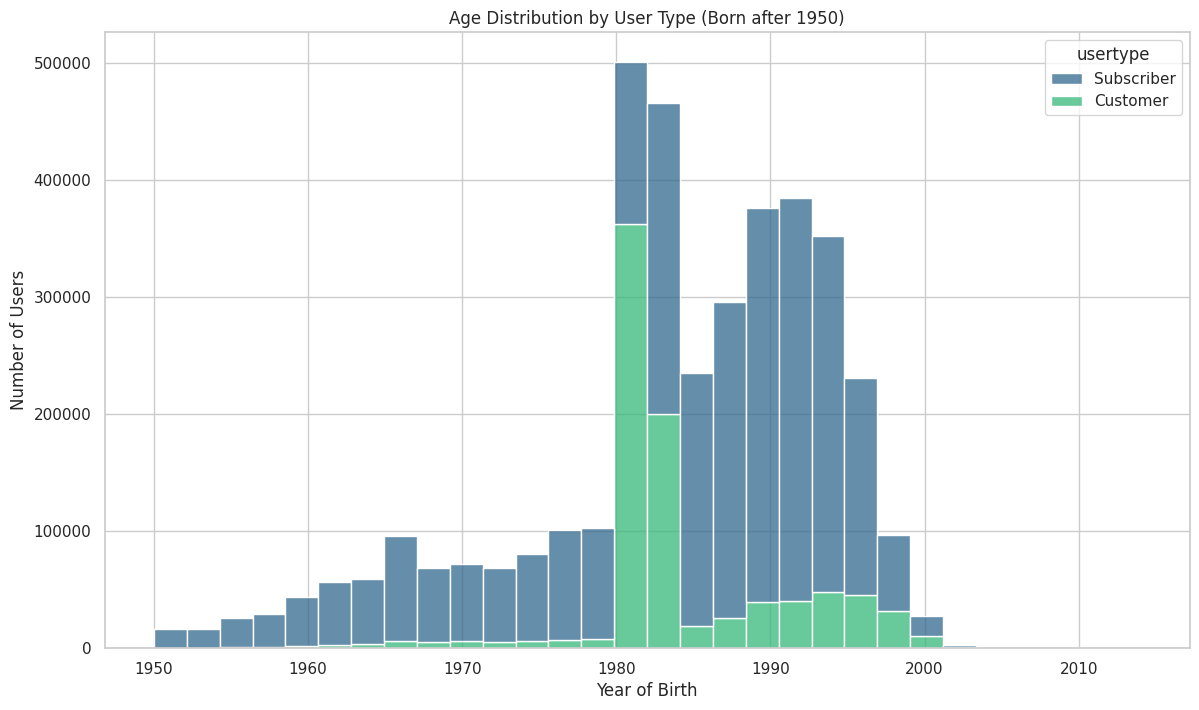

In [27]:
# Filter data by user born after 1950
filtered_data_age = all_data[all_data['birthyear'] >= 1950]

# Create histogram for age distribution
plt.figure(figsize=(14, 8))
sns.histplot(data=filtered_data_age, x='birthyear', hue='usertype', multiple='stack', bins=30, palette='viridis')
plt.title('Age Distribution by User Type (Born after 1950)')
plt.xlabel('Year of Birth')
plt.ylabel('Number of Users')
plt.show()

### Visualize Calculate trip count for each destination by user type

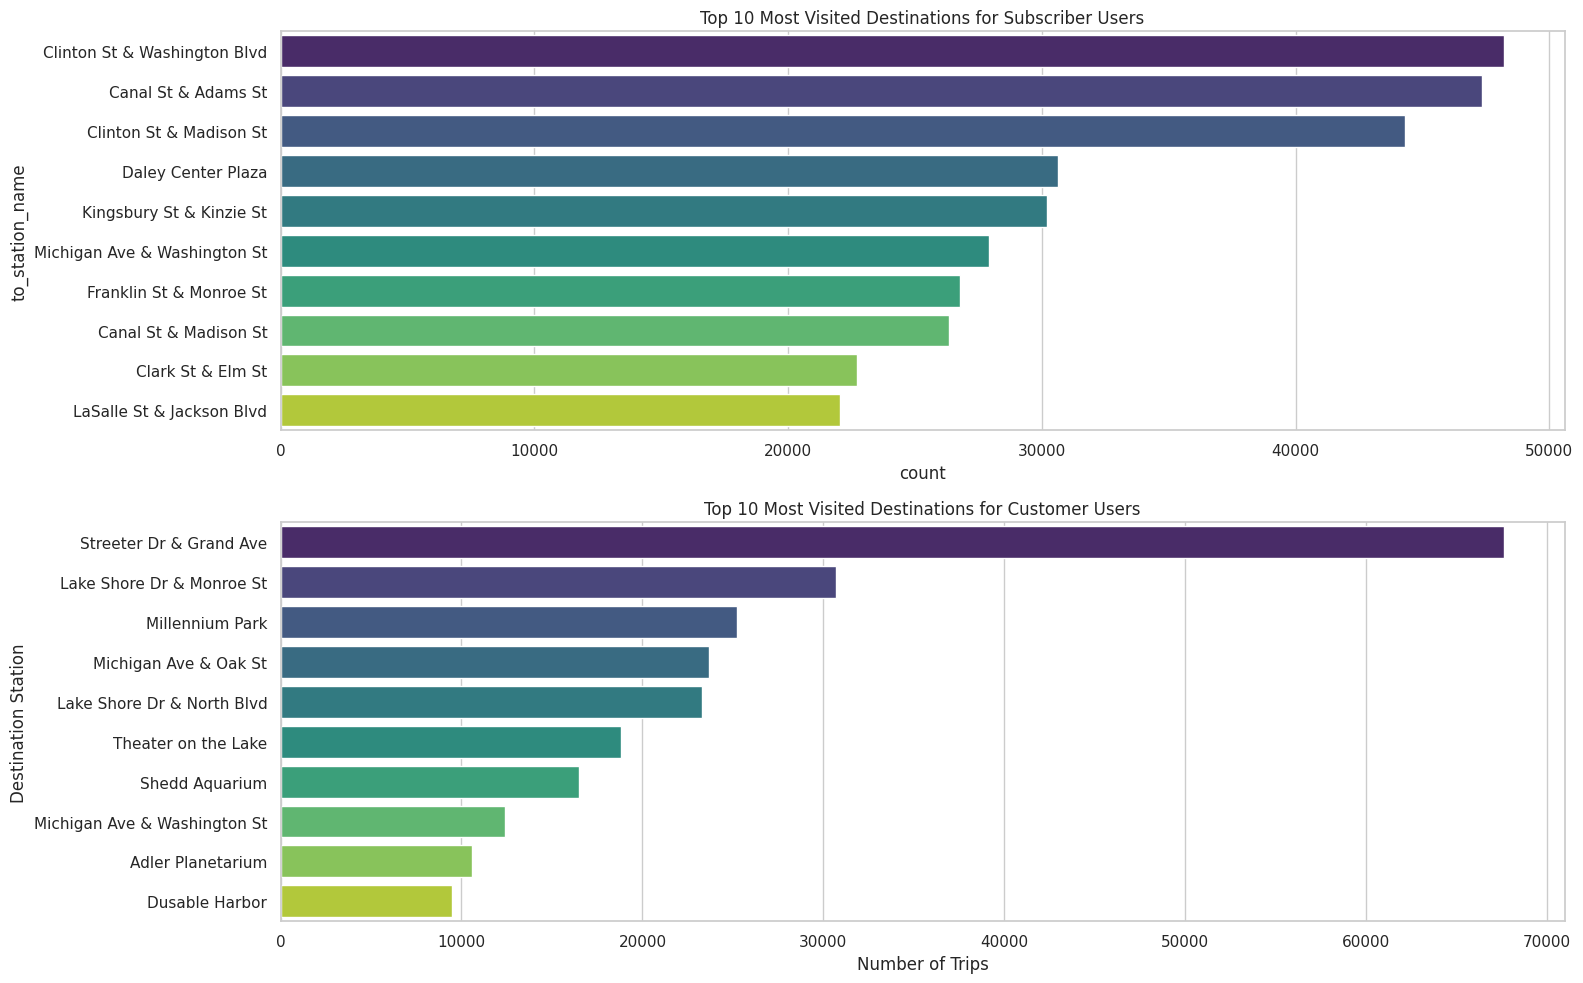

In [28]:
destinations_year = all_data.groupby(['to_station_name', 'usertype']).size().reset_index(name='count')

# Filter 10 most popular destinations for each type of user
top_destinations_subscriber_year = destinations_year[destinations_year['usertype'] == 'Subscriber'].nlargest(10, 'count')
top_destinations_customer_year = destinations_year[destinations_year['usertype'] == 'Customer'].nlargest(10, 'count')

# Create barplot graphics
plt.figure(figsize=(16, 10))

plt.subplot(2, 1, 1)
sns.barplot(x='count', y='to_station_name', data=top_destinations_subscriber_year, palette='viridis', order=top_destinations_subscriber_year['to_station_name'])
plt.title('Top 10 Most Visited Destinations for Subscriber Users')

plt.subplot(2, 1, 2)
sns.barplot(x='count', y='to_station_name', data=top_destinations_customer_year, palette='viridis', order=top_destinations_customer_year['to_station_name'])
plt.title('Top 10 Most Visited Destinations for Customer Users')

plt.xlabel('Number of Trips')
plt.ylabel('Destination Station')
plt.tight_layout()

# Save as Images
plt.savefig('top_destinations_by_user_year.png')
plt.show()